In [4]:
import pylab as pl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
%matplotlib inline
import json
from sklearn import preprocessing
from random import *
from lib import audio_methods
from lib import formatter
from lib import base

from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn import metrics

In [5]:
train_pca = pd.read_csv("./data_frames/pca_item_matrix.csv")

## K-Means Clustering

We continue onto modeling K-means using 5 components. There are 15 clusters tested with K equal to 50,100,150,...,1500. For each model, we evaluate its cohesion and separation by measuring its Silhouette and Dunn's index.

In [14]:
##################################################
##         WARNING: THIS TAKES FOREVER          ##
##    ONLY run if data doesn't already exist.   ##
##    Otherwise, run the next block instead.    ##
##################################################

SEED = 5523
kmeans_inertia = []
silhouette = []
dunn = []
k_values = range(50,1550,50)

for k in k_values:
    print("K: ",k)
    
    # Generate model
    temp = KMeans(n_clusters=k,random_state=SEED).fit(train_pca)
    # Obtain Silhouette score
    sil = metrics.silhouette_score(train_pca,temp.labels_,metric='euclidean')
    # Obtain Dunn's index
    dun = base.dunn_fast(train_pca,temp.labels_)

    
    # do after
    # Add to arrays
    kmeans_inertia.append(round(temp.inertia_))
    silhouette.append(round(sil,4))
    dunn.append(round(dun,4))

eval_matrix = pd.DataFrame({
    'Num Clusters':k_values,
    'SSE':kmeans_inertia,
    'Silhouette':silhouette,
    'Dunns':dunn
})

eval_matrix.to_csv("./data_frames/eval_matrix.csv")

In [15]:
###############################
##  Only run if data exists  ##
###############################

eval_matrix = pd.read_csv("./data_frames/eval_matrix.csv",usecols = [1,2,3,4])
eval_matrix

,Num Clusters,SSE,Silhouette,Dunns
0,50,37761.2787,0.1708,0.0061
1,100,27446.6949,0.1665,0.0094
2,150,22709.7512,0.1608,0.0074
3,200,19876.2033,0.1627,0.0091
4,250,17961.5138,0.1601,0.0106
5,300,16474.0111,0.1587,0.0101
6,350,15312.1888,0.1577,0.0094
7,400,14350.9162,0.1589,0.0078
8,450,13589.7203,0.1568,0.0136
9,500,12906.5456,0.1568,0.0114


In [17]:
##################################################
##         WARNING: THIS TAKES FOREVER          ##
##    ONLY run if data doesn't already exist.   ##
##    Otherwise, run the next block instead.    ##
##################################################

SEED=5523
kmeans_50 = KMeans(n_clusters=50,random_state=SEED).fit(train_pca)
kmeans_400 = KMeans(n_clusters=400,random_state=SEED).fit(train_pca)
kmeans_800 = KMeans(n_clusters=800,random_state=SEED).fit(train_pca)
kmeans_1200 = KMeans(n_clusters=1200,random_state=SEED).fit(train_pca)
kmeans_1500 = KMeans(n_clusters=1500,random_state=SEED).fit(train_pca)

various_k_models = pd.DataFrame(index=range(0,34442),data = {
    'K=50':kmeans_50.labels_,
    'K=400':kmeans_400.labels_,
    'K=800':kmeans_800.labels_,
    'K=1200':kmeans_1200.labels_,
    'K=1500':kmeans_1500.labels_
})
various_k_models = pd.concat([various_k_models, train_pca.reset_index(drop=True)], axis=1)
various_k_models.to_csv("./data_frames/various_k_models.csv")
various_k_models

In [18]:
###############################
##  Only run if data exists  ##
###############################

various_k_models = pd.read_csv("./data_frames/various_k_models.csv",usecols = range(1,11))
various_k_models

,K=50,K=400,K=800,K=1200,K=1500,PC1,PC2,PC3,PC4,PC5
0,29,61,255,222,1298,-1.754467,1.750825,-0.783555,-0.631788,0.484726
1,38,338,339,444,1204,-2.335419,0.748458,-0.089094,-0.561038,0.747956
2,29,399,336,499,1182,-1.263240,1.193045,-0.063982,-0.033998,0.071014
3,29,119,541,561,222,-1.310803,2.241439,-0.588734,-0.055600,0.299317
4,8,313,236,517,1279,-1.248762,1.315978,0.014835,1.099243,0.223407
...,...,...,...,...,...,...,...,...,...,...
34437,32,27,131,885,885,2.563366,1.719795,-0.135897,0.455785,-0.531072
34438,21,96,397,1104,1104,-0.429882,0.091292,0.435006,1.104856,-0.700108
34439,33,252,777,1129,1129,0.712116,-0.027654,0.560080,-0.316299,-0.141671
34440,31,108,147,883,883,2.229248,0.298709,0.460573,-0.537482,-0.797268


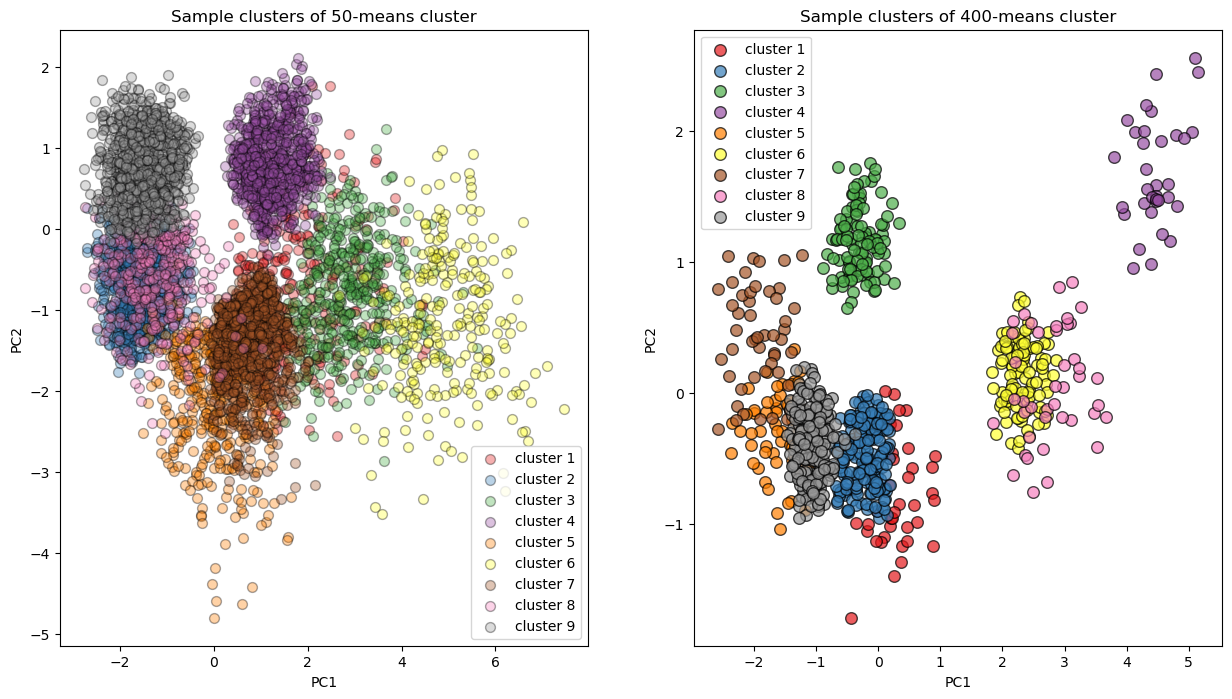

In [19]:
cols = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628','#f781bf','#999999']

plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
for i in range(9):
    plt.scatter(
        various_k_models[(various_k_models['K=50'] == i)]['PC1'], 
        various_k_models[(various_k_models['K=50'] == i)]['PC2'],
        s=50, c=cols[i],
        marker='o', edgecolor='black',
        label='cluster '+str(i+1),
        alpha=0.35
    )

plt.title("Sample clusters of 50-means cluster")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(scatterpoints=1)

plt.subplot(1,2,2)
for i in range(9):
    plt.scatter(
        various_k_models[(various_k_models['K=400'] == i)]['PC1'], 
        various_k_models[(various_k_models['K=400'] == i)]['PC2'],
        s=70, c=cols[i],
        marker='o', edgecolor='black',
        label='cluster '+str(i+1),
        alpha=0.70
    )

plt.title("Sample clusters of 400-means cluster")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(scatterpoints=1)

plt.show()

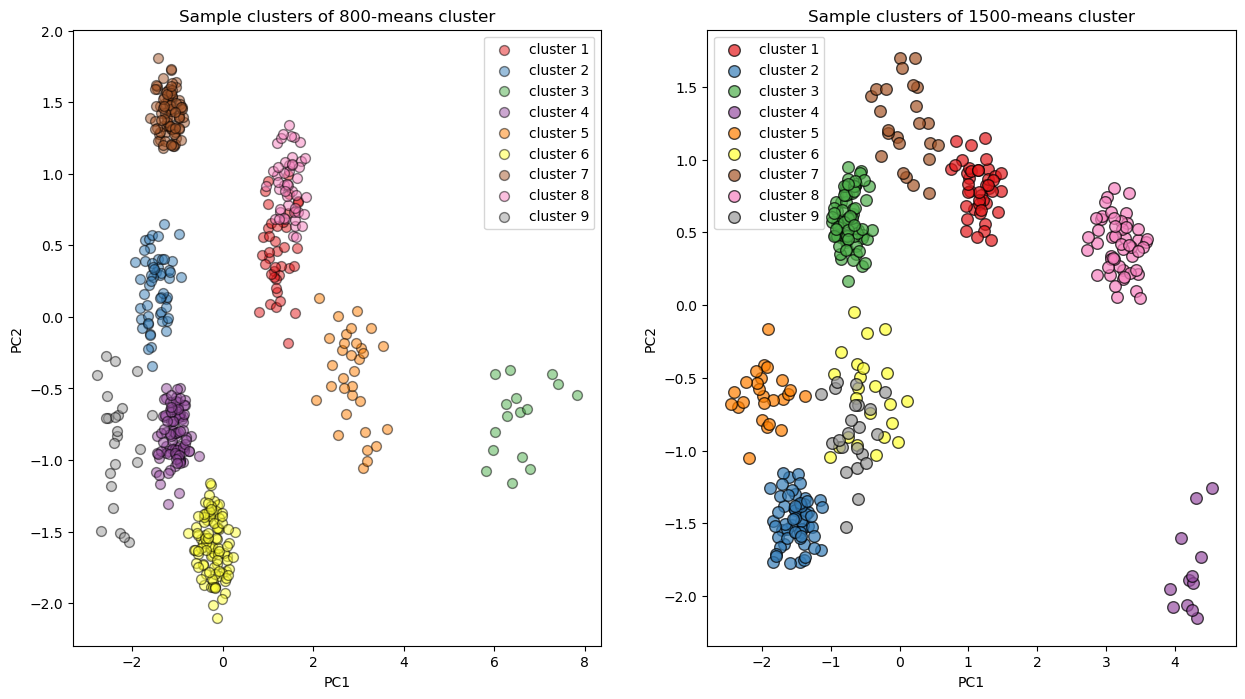

In [20]:
plt.figure(figsize=(15,8))
plt.subplot(1,2,1)
for i in range(9):
    plt.scatter(
        various_k_models[(various_k_models['K=800'] == i)]['PC1'], 
        various_k_models[(various_k_models['K=800'] == i)]['PC2'],
        s=50, c=cols[i],
        marker='o', edgecolor='black',
        label='cluster '+str(i+1),
        alpha=0.50
    )

plt.title("Sample clusters of 800-means cluster")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(scatterpoints=1)

plt.subplot(1,2,2)
for i in range(9):
    plt.scatter(
        various_k_models[(various_k_models['K=1200'] == i)]['PC1'], 
        various_k_models[(various_k_models['K=1200'] == i)]['PC2'],
        s=70, c=cols[i],
        marker='o', edgecolor='black',
        label='cluster '+str(i+1),
        alpha=0.70
    )

plt.title("Sample clusters of 1500-means cluster")
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend(scatterpoints=1)

plt.show()

## Sample tracks from clusters

Now we check what tracks the models clustered together.

In [21]:
SEED = 5523


In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import silhouette_score as sc
from sklearn.cluster import MeanShift, estimate_bandwidth

def cv_silhouette_scorer(estimator, X): 
    return metrics.silhouette_score(X,estimator.labels_,metric='euclidean')

def cv_sse_scorer(estimator,X):
    return round(estimator.inertia_)
    
# param_grid = {'n_clusters' : range(200,600,50), 'random_state':[SEED]} # 
# trained_kmeans = GridSearchCV(KMeans(),param_grid, scoring={'silhouette':cv_silhouette_scorer, 'sse':cv_sse_scorer}, cv=[(slice(None), slice(None))], verbose=999, n_jobs=20, refit=False)
# trained_kmeans.fit(train_pca)

bandwidths = []
for quantile in [0.005, 0.01, 0.05, 0.25]:
    bandwidths += [estimate_bandwidth(train_pca, quantile=quantile, n_samples=5000, n_jobs=4)]
    
print(bandwidths) 
param_grid = {'bandwidth': bandwidths, 'cluster_all':[True], 'n_jobs':[5]}
trained_ms = GridSearchCV(MeanShift(),param_grid, scoring={'silhouette':cv_silhouette_scorer}, cv=[(slice(None), slice(None))], verbose=999, n_jobs=4, refit=False)
trained_ms.fit(train_pca)

    

[0.910495775369148, 1.0830486916892914, 1.6515101193491966, 2.5659168024331773]
Fitting 1 folds for each of 4 candidates, totalling 4 fits
[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done   1 tasks      | elapsed:  3.6min
[Parallel(n_jobs=4)]: Done   2 out of   4 | elapsed:  6.3min remaining:  6.3min
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed: 11.3min remaining:    0.0s
[Parallel(n_jobs=4)]: Done   4 out of   4 | elapsed: 11.3min finished


GridSearchCV(cv=[(slice(None, None, None), slice(None, None, None))],
             estimator=MeanShift(), n_jobs=4,
             param_grid={'bandwidth': [0.910495775369148, 1.0830486916892914,
                                       1.6515101193491966, 2.5659168024331773],
                         'cluster_all': [True], 'n_jobs': [5]},
             refit=False,
             scoring={'silhouette': <function cv_silhouette_scorer at 0x0000019B6E34FCA0>},
             verbose=999)

## Model Evaluation

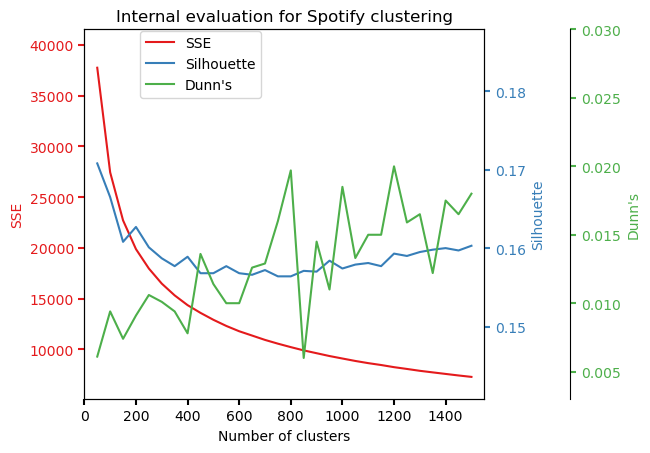

In [16]:
def make_patch_spines_invisible(ax):
    ax.set_frame_on(True)
    ax.patch.set_visible(False)
    for sp in ax.spines.values():
        sp.set_visible(False)
        
k_values = range(50,1550,50)
kmeans_inertia = eval_matrix['SSE']
silhouette = eval_matrix['Silhouette']
dunn = eval_matrix['Dunns']

plt.style.use("default")
fig, host = plt.subplots()
fig.subplots_adjust(right=0.75)

par1 = host.twinx()
par2 = host.twinx()

par2.spines["right"].set_position(("axes", 1.215))
make_patch_spines_invisible(par2)
par2.spines["right"].set_visible(True)

p1, = host.plot(k_values, kmeans_inertia, cols[0], label="SSE")
p2, = par1.plot(k_values, silhouette, cols[1], label="Silhouette")
p3, = par2.plot(k_values, dunn, cols[2], label="Dunn's")

host.set_xlim(0, 1550)

# Auto calculate y axises
ylow = min(eval_matrix['SSE'])*0.7
yhigh = max(eval_matrix['SSE'])*1.1
host.set_ylim(ylow, yhigh)

ylow = min(eval_matrix['Silhouette'])*0.9
yhigh = max(eval_matrix['Silhouette'])*1.1
par1.set_ylim(ylow, yhigh)

ylow = min(eval_matrix['Dunns'])*0.5
yhigh = max(eval_matrix['Dunns'])*1.5
par2.set_ylim(ylow, yhigh)

host.set_xlabel("Number of clusters")
host.set_ylabel("SSE")
par1.set_ylabel("Silhouette")
par2.set_ylabel("Dunn's")

host.yaxis.label.set_color(p1.get_color())
par1.yaxis.label.set_color(p2.get_color())
par2.yaxis.label.set_color(p3.get_color())

tkw = dict(size=4, width=1.5)
host.tick_params(axis='y', colors=p1.get_color(), **tkw)
par1.tick_params(axis='y', colors=p2.get_color(), **tkw)
par2.tick_params(axis='y', colors=p3.get_color(), **tkw)
host.tick_params(axis='x', **tkw)

lines = [p1, p2, p3]

host.legend(lines, [l.get_label() for l in lines],loc=(.14,.815))

plt.title("Internal evaluation for Spotify clustering")
plt.show()